# Análise de Dados - Cancelamento de Serviço

Você foi contratado por uma empresa com mais de 800 mil clientes para um projeto de análise de dados. Recentemente, a empresa percebeu que a maioria de sua base de clientes é composta por clientes inativos, ou seja, aqueles que já cancelaram o serviço. Com o objetivo de melhorar seus resultados, a empresa deseja entender os principais motivos desses cancelamentos e identificar as ações mais eficientes para reduzir esse número.

Projeto inspirado em uma Masterclass de Análise de Dados realizada pela escola de programação Hashtag. A solução de código proposta aqui é diferente da original.

Base de dados original e arquivos: https://drive.google.com/drive/folders/1uDesZePdkhiraJmiyeZ-w5tfc8XsNYFZ?usp=drive_link

## 1 Importar bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2 Carregar e Adequar base de Dados

In [2]:
tabela = pd.read_csv("cancelamentos_sample.csv")

In [3]:
display(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              50000 non-null  float64
 1   idade                   50000 non-null  float64
 2   sexo                    49997 non-null  object 
 3   tempo_como_cliente      49998 non-null  float64
 4   frequencia_uso          50000 non-null  float64
 5   ligacoes_callcenter     50000 non-null  float64
 6   dias_atraso             50000 non-null  float64
 7   assinatura              50000 non-null  object 
 8   duracao_contrato        50000 non-null  object 
 9   total_gasto             50000 non-null  float64
 10  meses_ultima_interacao  50000 non-null  float64
 11  cancelou                50000 non-null  float64
dtypes: float64(9), object(3)
memory usage: 4.6+ MB


None

In [4]:
# excluir coluna CustomerID
tabela = tabela.drop(columns="CustomerID")
display(tabela)

,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao,cancelou
0,23.0,Male,13.0,22.0,2.0,1.0,Standard,Annual,909.58,23.0,0.0
1,49.0,Male,55.0,16.0,3.0,6.0,Premium,Monthly,207.00,29.0,1.0
2,30.0,Male,7.0,1.0,0.0,8.0,Basic,Annual,768.78,7.0,0.0
3,26.0,Male,40.0,5.0,3.0,8.0,Premium,Annual,398.00,12.0,1.0
4,27.0,Female,17.0,30.0,5.0,6.0,Basic,Annual,507.00,15.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
49995,62.0,Female,35.0,7.0,2.0,8.0,Basic,Annual,232.00,15.0,1.0
49996,36.0,Male,43.0,21.0,2.0,30.0,Basic,Quarterly,928.00,30.0,1.0
49997,55.0,Male,42.0,8.0,1.0,12.0,Basic,Monthly,326.00,27.0,1.0
49998,40.0,Female,14.0,19.0,1.0,17.0,Premium,Quarterly,826.76,12.0,0.0


In [5]:
# excluir as linhas que têm valores vazios
tabela = tabela.dropna()
display(tabela.info())

<class 'pandas.core.frame.DataFrame'>
Index: 49996 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   idade                   49996 non-null  float64
 1   sexo                    49996 non-null  object 
 2   tempo_como_cliente      49996 non-null  float64
 3   frequencia_uso          49996 non-null  float64
 4   ligacoes_callcenter     49996 non-null  float64
 5   dias_atraso             49996 non-null  float64
 6   assinatura              49996 non-null  object 
 7   duracao_contrato        49996 non-null  object 
 8   total_gasto             49996 non-null  float64
 9   meses_ultima_interacao  49996 non-null  float64
 10  cancelou                49996 non-null  float64
dtypes: float64(8), object(3)
memory usage: 4.6+ MB


None

## 3 Análise de Cancelamentos

=== Análise de Cancelamentos ===

Números totais:
Não cancelaram: 21603 clientes
Cancelaram: 28393 clientes
Total: 49996 clientes

Proporção:
Não cancelaram: 43.21%
Cancelaram: 56.79%


/tmp/ipykernel_386524/682509779.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cancelou', data=tabela, palette=['green', 'red'])


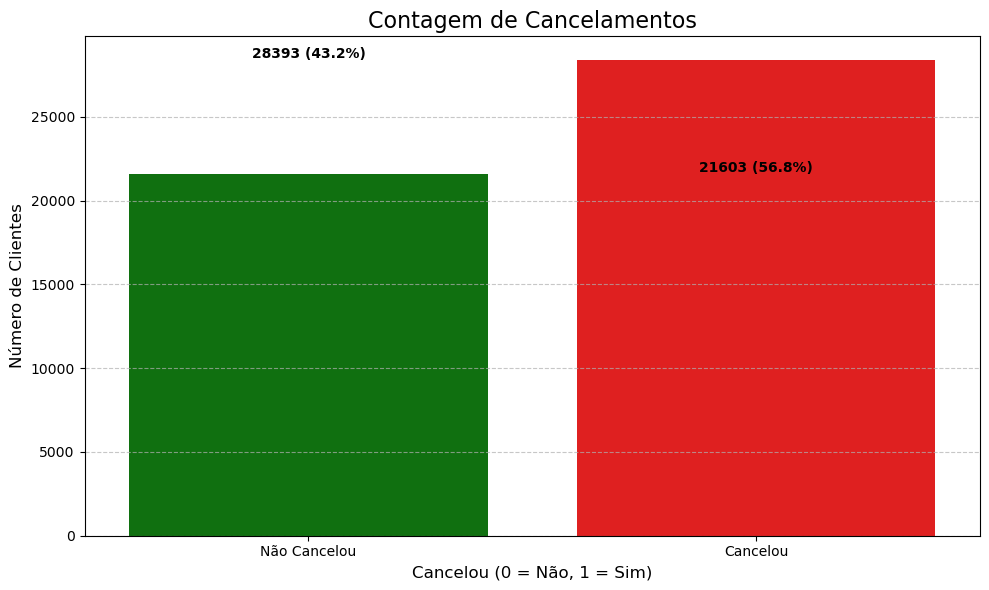

In [6]:
# =============================================
# Análise de Cancelamentos
# =============================================

# Contagem de clientes que cancelaram e não cancelaram
cancelamentos = tabela['cancelou'].value_counts()

# Exibindo os números totais
print("=== Análise de Cancelamentos ===")
print("\nNúmeros totais:")
print(f"Não cancelaram: {cancelamentos[0]} clientes")
print(f"Cancelaram: {cancelamentos[1]} clientes")
print(f"Total: {tabela.shape[0]} clientes")

# Exibindo as proporções
proporcao_cancelamentos = tabela['cancelou'].value_counts(normalize=True) * 100
print("\nProporção:")
print(f"Não cancelaram: {proporcao_cancelamentos[0]:.2f}%")
print(f"Cancelaram: {proporcao_cancelamentos[1]:.2f}%")

# Visualização gráfica da proporção de cancelamentos
plt.figure(figsize=(10, 6))
sns.countplot(x='cancelou', data=tabela, palette=['green', 'red'])
plt.title('Contagem de Cancelamentos', fontsize=16)
plt.xlabel('Cancelou (0 = Não, 1 = Sim)', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks([0, 1], ['Não Cancelou', 'Cancelou'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionando os valores em cada barra
for i, count in enumerate(cancelamentos):
    plt.text(i, count + 100, f'{count} ({proporcao_cancelamentos[i]:.1f}%)', 
             ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('cancelamentos_contagem.png')
plt.show()

## 4 Análise do impacto das features nos cancelamentos


=== Impacto das Features nos Cancelamentos ===


/tmp/ipykernel_386524/1749532898.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cancelou', y=coluna, data=tabela, palette=['green', 'red'])


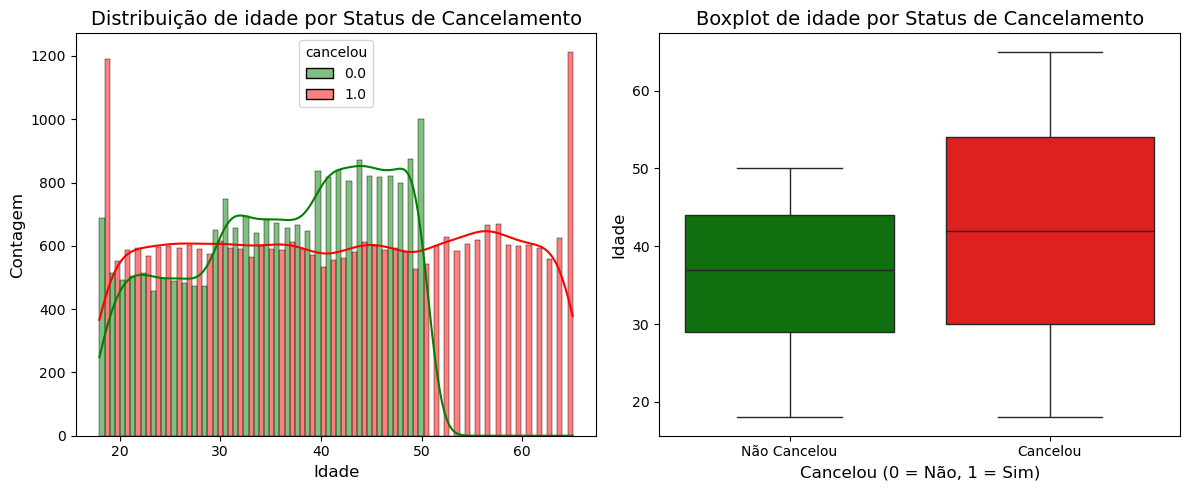


Estatísticas para: idade
       Não Cancelou  Cancelou
count      21603.00  28393.00
mean          36.26     41.66
std            9.23     13.91
min           18.00     18.00
25%           29.00     30.00
50%           37.00     42.00
75%           44.00     54.00
max           50.00     65.00


/tmp/ipykernel_386524/1749532898.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cancelou', y=coluna, data=tabela, palette=['green', 'red'])


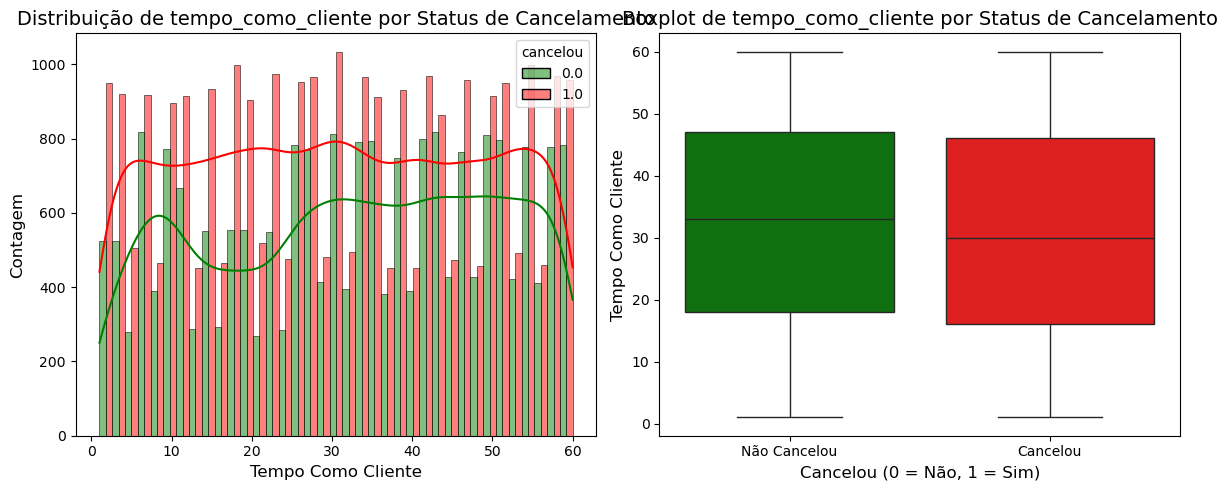


Estatísticas para: tempo_como_cliente
       Não Cancelou  Cancelou
count      21603.00  28393.00
mean          32.26     30.59
std           17.10     17.30
min            1.00      1.00
25%           18.00     16.00
50%           33.00     30.00
75%           47.00     46.00
max           60.00     60.00


/tmp/ipykernel_386524/1749532898.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cancelou', y=coluna, data=tabela, palette=['green', 'red'])


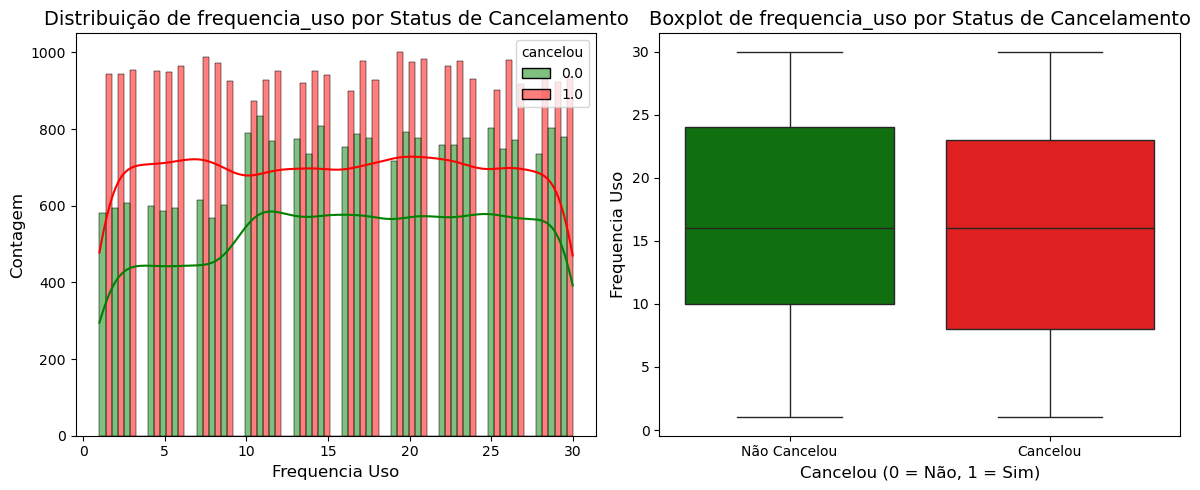


Estatísticas para: frequencia_uso
       Não Cancelou  Cancelou
count      21603.00  28393.00
mean          16.26     15.48
std            8.44      8.65
min            1.00      1.00
25%           10.00      8.00
50%           16.00     16.00
75%           24.00     23.00
max           30.00     30.00


/tmp/ipykernel_386524/1749532898.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cancelou', y=coluna, data=tabela, palette=['green', 'red'])


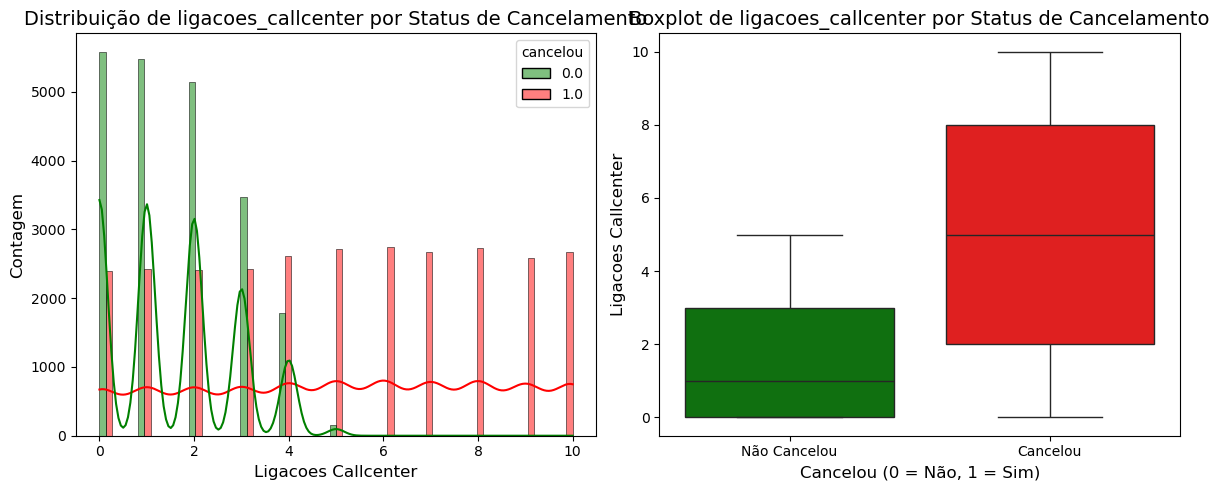


Estatísticas para: ligacoes_callcenter
       Não Cancelou  Cancelou
count      21603.00  28393.00
mean           1.58      5.13
std            1.29      3.13
min            0.00      0.00
25%            0.00      2.00
50%            1.00      5.00
75%            3.00      8.00
max            5.00     10.00


/tmp/ipykernel_386524/1749532898.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cancelou', y=coluna, data=tabela, palette=['green', 'red'])


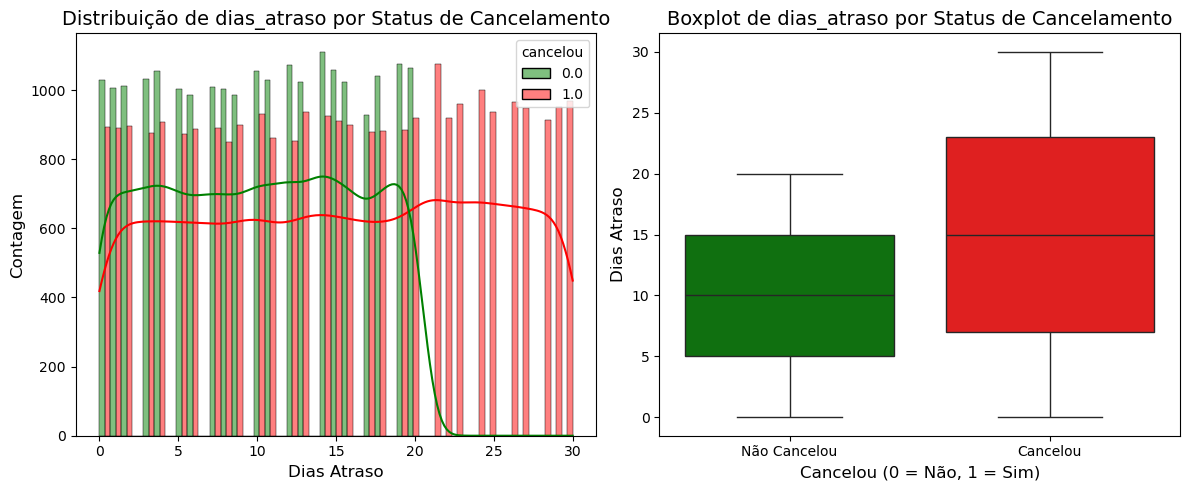


Estatísticas para: dias_atraso
       Não Cancelou  Cancelou
count      21603.00  28393.00
mean          10.06     15.26
std            6.06      8.97
min            0.00      0.00
25%            5.00      7.00
50%           10.00     15.00
75%           15.00     23.00
max           20.00     30.00


/tmp/ipykernel_386524/1749532898.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cancelou', y=coluna, data=tabela, palette=['green', 'red'])


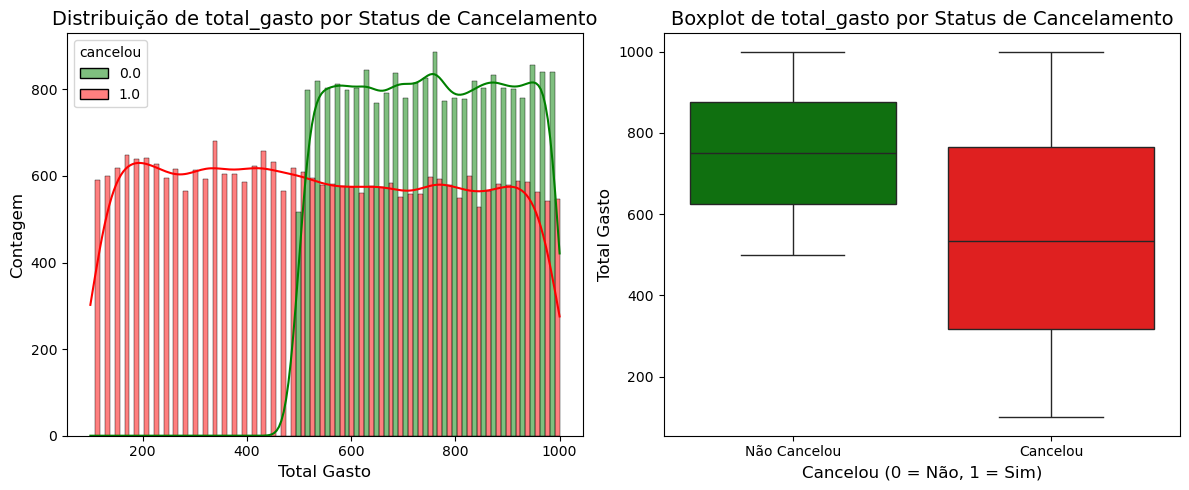


Estatísticas para: total_gasto
       Não Cancelou  Cancelou
count      21603.00  28393.00
mean         751.08    540.95
std          144.54    259.64
min          500.01    100.00
25%          626.20    317.00
50%          751.58    534.00
75%          876.24    766.00
max         1000.00   1000.00


/tmp/ipykernel_386524/1749532898.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cancelou', y=coluna, data=tabela, palette=['green', 'red'])


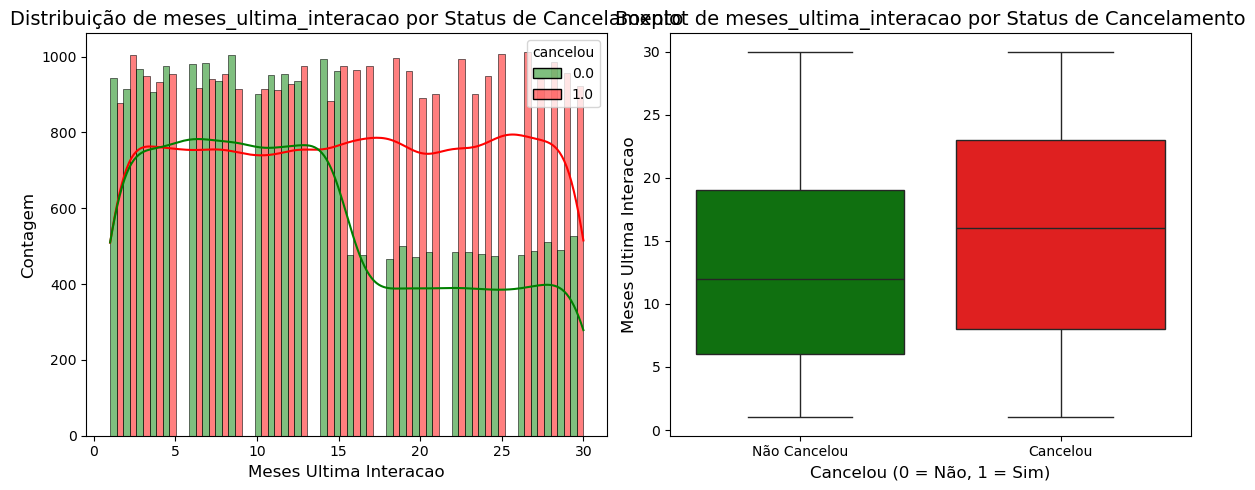


Estatísticas para: meses_ultima_interacao
       Não Cancelou  Cancelou
count      21603.00  28393.00
mean          13.11     15.58
std            8.33      8.66
min            1.00      1.00
25%            6.00      8.00
50%           12.00     16.00
75%           19.00     23.00
max           30.00     30.00


/tmp/ipykernel_386524/1749532898.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coluna, y='taxa_percentual', data=taxa_cancel, palette='viridis')


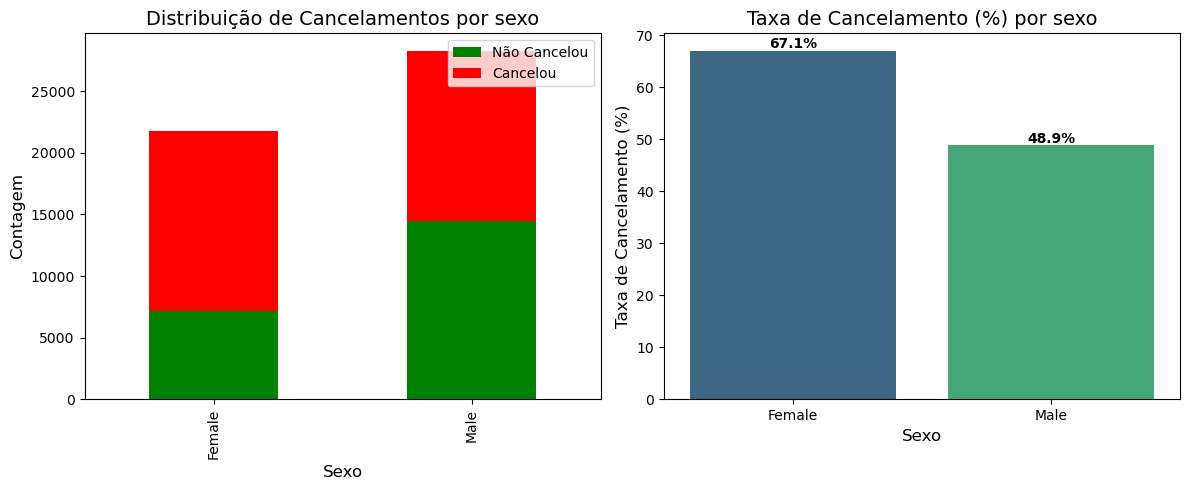


Distribuição para: sexo

Contagem por categoria:
cancelou    0.0    1.0
sexo                  
Female     7160  14575
Male      14443  13818

Percentual por categoria:
cancelou    0.0    1.0
sexo                  
Female    32.94  67.06
Male      51.11  48.89

Taxa de cancelamento por categoria:
     sexo  cancelou  taxa_percentual
0  Female      0.67            67.06
1    Male      0.49            48.89


/tmp/ipykernel_386524/1749532898.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coluna, y='taxa_percentual', data=taxa_cancel, palette='viridis')


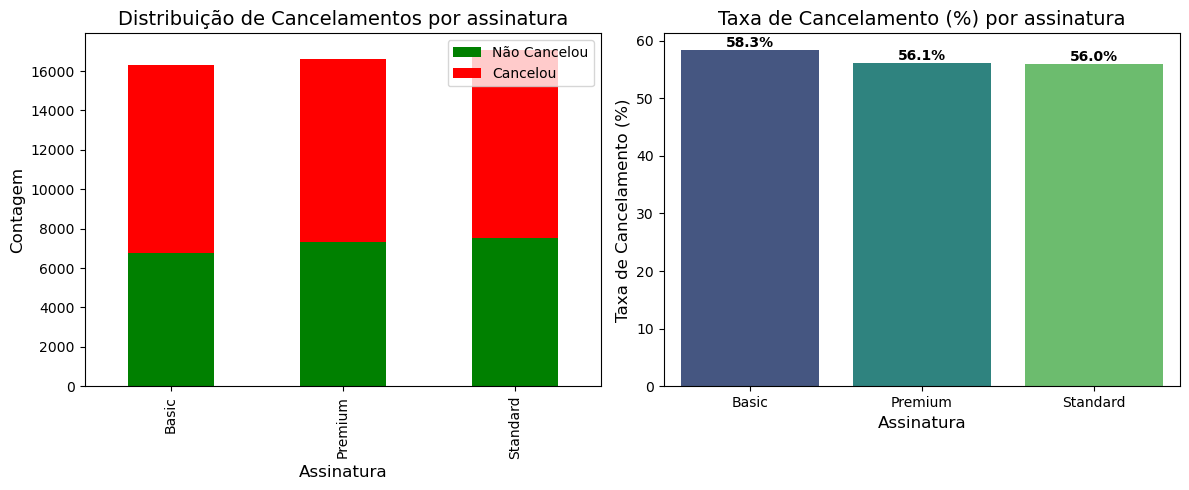


Distribuição para: assinatura

Contagem por categoria:
cancelou     0.0   1.0
assinatura            
Basic       6788  9508
Premium     7304  9333
Standard    7511  9552

Percentual por categoria:
cancelou      0.0    1.0
assinatura              
Basic       41.65  58.35
Premium     43.90  56.10
Standard    44.02  55.98

Taxa de cancelamento por categoria:
  assinatura  cancelou  taxa_percentual
0      Basic      0.58            58.35
1    Premium      0.56            56.10
2   Standard      0.56            55.98


/tmp/ipykernel_386524/1749532898.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coluna, y='taxa_percentual', data=taxa_cancel, palette='viridis')


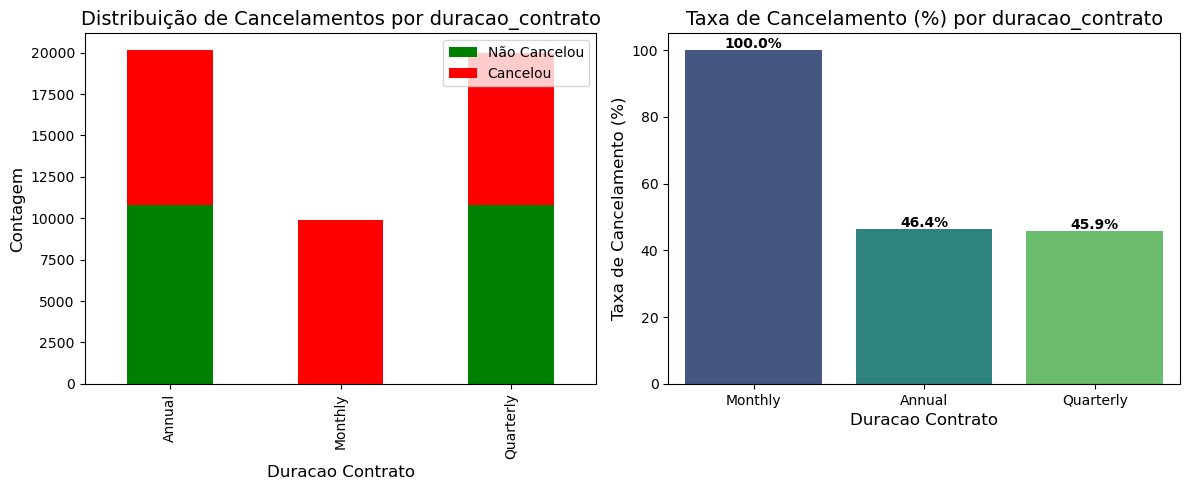


Distribuição para: duracao_contrato

Contagem por categoria:
cancelou            0.0   1.0
duracao_contrato             
Annual            10802  9354
Monthly               0  9884
Quarterly         10801  9155

Percentual por categoria:
cancelou            0.0     1.0
duracao_contrato               
Annual            53.59   46.41
Monthly            0.00  100.00
Quarterly         54.12   45.88

Taxa de cancelamento por categoria:
  duracao_contrato  cancelou  taxa_percentual
0          Monthly      1.00           100.00
1           Annual      0.46            46.41
2        Quarterly      0.46            45.88

Correlação entre variáveis numéricas e cancelamento:
cancelou                  1.000
ligacoes_callcenter       0.574
dias_atraso               0.312
idade                     0.216
meses_ultima_interacao    0.142
frequencia_uso           -0.045
tempo_como_cliente       -0.048
total_gasto              -0.432
Name: cancelou, dtype: float64


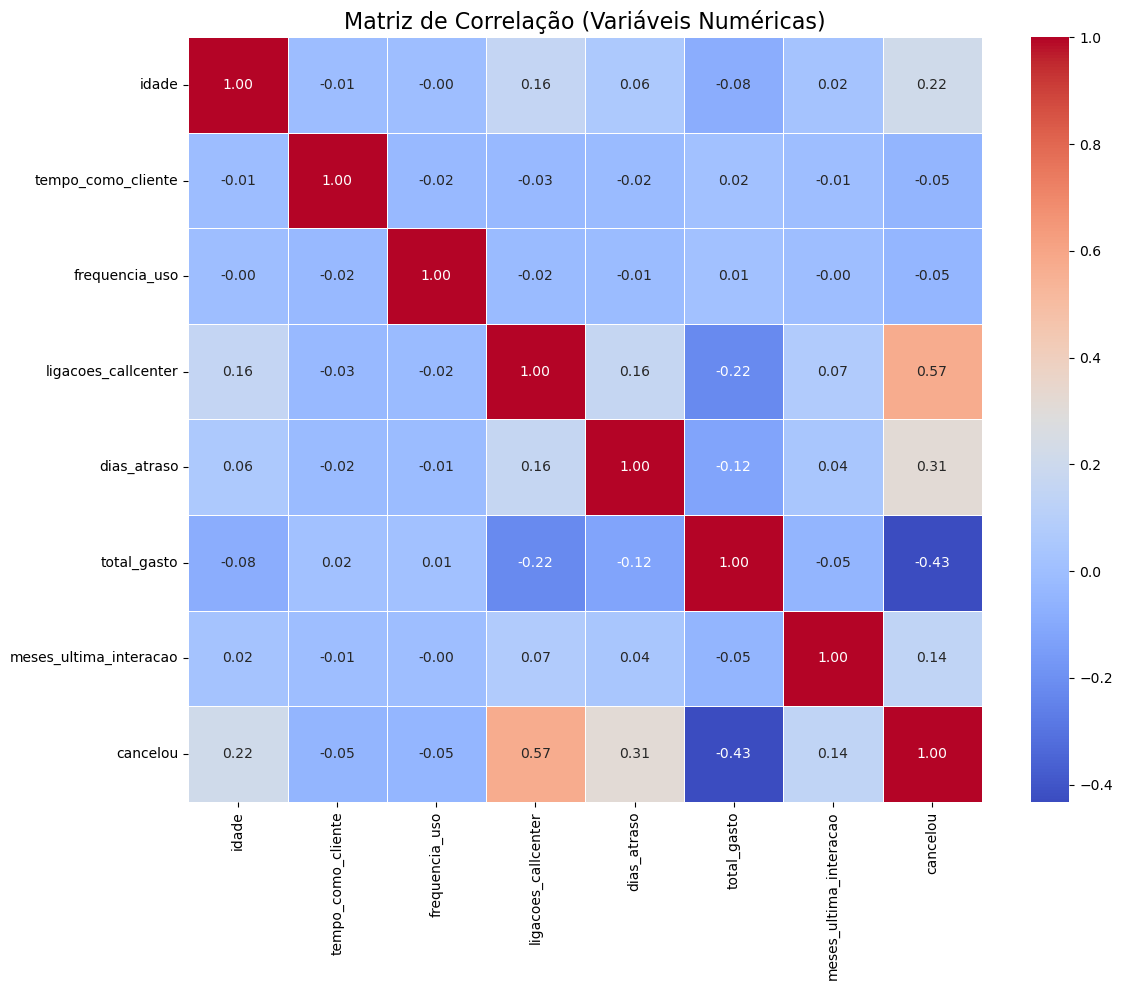

In [7]:
# =============================================
# Análise do impacto das features nos cancelamentos
# =============================================

print("\n=== Impacto das Features nos Cancelamentos ===")

# Função para analisar variáveis numéricas
def analisar_var_numerica(tabela, coluna):
    plt.figure(figsize=(12, 5))
    
    # Gráfico de distribuição
    plt.subplot(1, 2, 1)
    sns.histplot(data=tabela, x=coluna, hue='cancelou', multiple='dodge', kde=True, palette=['green', 'red'])
    plt.title(f'Distribuição de {coluna} por Status de Cancelamento', fontsize=14)
    plt.xlabel(coluna.replace('_', ' ').title(), fontsize=12)
    plt.ylabel('Contagem', fontsize=12)
    #plt.legend(['Não Cancelou', 'Cancelou'])
    
    # Gráfico de boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x='cancelou', y=coluna, data=tabela, palette=['green', 'red'])
    plt.title(f'Boxplot de {coluna} por Status de Cancelamento', fontsize=14)
    plt.xlabel('Cancelou (0 = Não, 1 = Sim)', fontsize=12)
    plt.xticks([0, 1], ['Não Cancelou', 'Cancelou'])
    plt.ylabel(coluna.replace('_', ' ').title(), fontsize=12)
    
    plt.tight_layout()
    plt.savefig(f'analise_{coluna}.png')
    plt.show()
    
    # Estatísticas descritivas
    print(f"\nEstatísticas para: {coluna}")
    stats_nao_cancelou = tabela[tabela['cancelou'] == 0][coluna].describe()
    stats_cancelou = tabela[tabela['cancelou'] == 1][coluna].describe()
    
    stats_comparacao = pd.DataFrame({
        'Não Cancelou': stats_nao_cancelou,
        'Cancelou': stats_cancelou
    })
    print(stats_comparacao.round(2))

# Função para analisar variáveis categóricas
def analisar_var_categorica(tabela, coluna):
    plt.figure(figsize=(12, 5))
    
    # Cálculo da taxa de cancelamento por categoria
    taxa_cancel = tabela.groupby(coluna)['cancelou'].mean().sort_values(ascending=False).reset_index()
    taxa_cancel['taxa_percentual'] = taxa_cancel['cancelou'] * 100
    
    # Contagem por categoria
    plt.subplot(1, 2, 1)
    cross_tab = pd.crosstab(tabela[coluna], tabela['cancelou'])
    cross_tab_percent = pd.crosstab(tabela[coluna], tabela['cancelou'], normalize='index') * 100
    cross_tab.plot(kind='bar', stacked=True, color=['green', 'red'], ax=plt.gca())
    plt.title(f'Distribuição de Cancelamentos por {coluna}', fontsize=14)
    plt.xlabel(coluna.replace('_', ' ').title(), fontsize=12)
    plt.ylabel('Contagem', fontsize=12)
    plt.legend(['Não Cancelou', 'Cancelou'], loc='upper right')
    
    # Taxa de cancelamento por categoria
    plt.subplot(1, 2, 2)
    sns.barplot(x=coluna, y='taxa_percentual', data=taxa_cancel, palette='viridis')
    plt.title(f'Taxa de Cancelamento (%) por {coluna}', fontsize=14)
    plt.xlabel(coluna.replace('_', ' ').title(), fontsize=12)
    plt.ylabel('Taxa de Cancelamento (%)', fontsize=12)
    
    # Adicionando os valores em cada barra
    for i, valor in enumerate(taxa_cancel['taxa_percentual']):
        plt.text(i, valor + 0.5, f'{valor:.1f}%', ha='center', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(f'analise_{coluna}.png')
    plt.show()
    
    # Tabela de contingência
    print(f"\nDistribuição para: {coluna}")
    print("\nContagem por categoria:")
    print(cross_tab)
    print("\nPercentual por categoria:")
    print(cross_tab_percent.round(2))
    print("\nTaxa de cancelamento por categoria:")
    print(taxa_cancel.round(2))

# Analisando features numéricas
variaveis_numericas = ['idade', 'tempo_como_cliente', 'frequencia_uso', 'ligacoes_callcenter', 
                       'dias_atraso', 'total_gasto', 'meses_ultima_interacao']

for var in variaveis_numericas:
    analisar_var_numerica(tabela, var)

# Analisando features categóricas
variaveis_categoricas = ['sexo', 'assinatura', 'duracao_contrato']

for var in variaveis_categoricas:
    analisar_var_categorica(tabela, var)

# Calculando correlação entre variáveis numéricas e cancelamento
# Selecionando apenas as colunas numéricas para correlação
colunas_numericas = tabela.select_dtypes(include=['number']).columns
corr = tabela[colunas_numericas].corr()['cancelou'].sort_values(ascending=False)
print("\nCorrelação entre variáveis numéricas e cancelamento:")
print(corr.round(3))

# Visualização da matriz de correlação apenas para variáveis numéricas
plt.figure(figsize=(12, 10))
sns.heatmap(tabela[colunas_numericas].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação (Variáveis Numéricas)', fontsize=16)
plt.tight_layout()
plt.savefig('matriz_correlacao.png')
plt.show()

#### Com base nos resultados apresentados, podemos identificar as variáveis que mais impactam no cancelamento:

## Variáveis com Maior Impacto Positivo no Cancelamento
(Quanto maior o valor, maior a chance de cancelamento)

1. **Ligações ao Call Center** (correlação: 0.574)
   - Os clientes que cancelam fazem em média 5.13 ligações ao call center, enquanto os que não cancelam fazem apenas 1.58
   - Esse é o fator mais fortemente correlacionado com cancelamento

2. **Dias de Atraso** (correlação: 0.312)
   - Clientes que cancelam têm em média 15.26 dias de atraso, versus 10.06 dias para os que não cancelam
   - Atrasos maiores estão claramente associados a maior taxa de cancelamento

3. **Idade** (correlação: 0.216)
   - Clientes mais velhos têm maior probabilidade de cancelar (média de 41.66 anos para cancelados versus 36.26 para não cancelados)

4. **Meses desde a Última Interação** (correlação: 0.142)
   - Clientes que cancelam estão, em média, há mais tempo sem interagir com a empresa (15.58 meses versus 13.11 meses)

## Variáveis com Maior Impacto Negativo no Cancelamento
(Quanto maior o valor, menor a chance de cancelamento)

1. **Total Gasto** (correlação: -0.432)
   - Clientes que não cancelam gastam significativamente mais (média de R$751.08) do que os que cancelam (média de R$540.95)
   - Esta é a variável que mais contribui para a retenção de clientes

2. **Tempo como Cliente** e **Frequência de Uso** têm correlações negativas fracas, indicando que têm pouca influência na retenção

## Variáveis Categóricas com Maior Impacto

1. **Duração do Contrato**
   - **100%** dos clientes com contrato mensal cancelaram o serviço
   - Contratos anuais e trimestrais têm taxas de cancelamento similares (46.41% e 45.88% respectivamente)

2. **Sexo**
   - Mulheres têm uma taxa de cancelamento muito maior (67.06%) que homens (48.89%)

3. **Tipo de Assinatura**
   - Assinaturas "Basic" têm taxa de cancelamento ligeiramente maior (58.35%) que "Premium" (56.10%) e "Standard" (55.98%)

## Principais Insights

1. O número de ligações ao call center é o indicador mais forte de cancelamento, sugerindo que clientes com problemas não resolvidos acabam cancelando.

2. O valor total gasto com o serviço é o fator mais forte para retenção, indicando que clientes que encontram mais valor no serviço tendem a permanecer.

3. A duração do contrato é crítica - contratos mensais apresentam risco extremamente alto de cancelamento.

4. O segmento de mulheres apresenta risco significativamente maior de cancelamento.

5. Dias de atraso nas faturas também são um forte indicador de cancelamento iminente.

Estas informações podem ser usadas para criar um modelo preditivo de cancelamento e desenvolver estratégias direcionadas de retenção de clientes.